In [1]:
"""
Load the IMDB dataset

Use 32 hidden units per layer instead of 16
Use the mse loss function instead of binary_crossentropy
Use the tanh activation function instead of relu
"""

HIDDEN_LAYERS = 3
NUM_UNITS = 32
LOSS_FUNCTION = 'mse'
ACTIVATION = 'tanh'

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
# Encoding the integer sequences into a binary matrix

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
# The model definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(NUM_UNITS, activation=ACTIVATION, input_shape=(10000,)))
model.add(layers.Dense(NUM_UNITS, activation=ACTIVATION))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
# Compiling the model

model.compile(optimizer='rmsprop',
              loss=LOSS_FUNCTION,
              metrics=['accuracy'])

In [5]:
# Configuring the optimizer

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=LOSS_FUNCTION,
              metrics=['accuracy'])

In [6]:
# Using custom losses and metrics

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,
              metrics=[metrics.binary_accuracy])

In [7]:
# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
# Training the model

model.compile(optimizer='rmsprop',
              loss=LOSS_FUNCTION,
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.1516 - acc: 0.7900 - val_loss: 0.0988 - val_acc: 0.8742
Epoch 2/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.0715 - acc: 0.9091 - val_loss: 0.1005 - val_acc: 0.8629
Epoch 3/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.0507 - acc: 0.9358 - val_loss: 0.1007 - val_acc: 0.8645
Epoch 4/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.0401 - acc: 0.9487 - val_loss: 0.0930 - val_acc: 0.8785
Epoch 5/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.0293 - acc: 0.9648 - val_loss: 0.0980 - val_acc: 0.8764
Epoch 6/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.0248 - acc: 0.9697 - val_loss: 0.0956 - val_acc: 0.8810
Epoch 7/20
15000/15000 [==============================] - 2s 157us/step - 

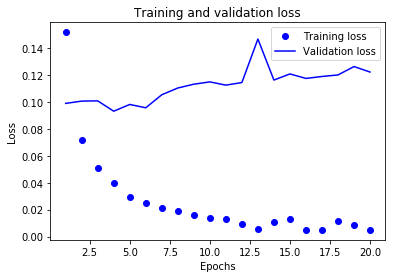

In [11]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

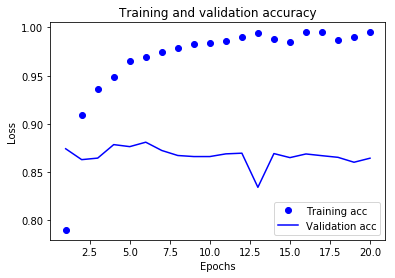

In [10]:
# Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()